In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [27]:
# Read file CSV 
file_path = 'C:/Users/Admin/Desktop/fraud_detection_project/data/processed/clean_credit_card_transactions.csv'
df = pd.read_csv(file_path)

In [28]:
# Overview of data
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_zipcode,age,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,trans_day_of_week,age_group
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,28705.0,31,2019,1,1,0,0,18,Tuesday,Aged 29-39
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Unknown,41,2019,1,1,0,0,44,Tuesday,Aged 39-49
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,83236.0,57,2019,1,1,0,0,51,Tuesday,Aged 49-59
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Unknown,52,2019,1,1,0,1,16,Tuesday,Aged 49-59
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,22844.0,33,2019,1,1,0,3,6,Tuesday,Aged 29-39


In [29]:
# Info of each columns in table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cc_num             1296675 non-null  int64  
 1   merchant           1296675 non-null  object 
 2   category           1296675 non-null  object 
 3   amt                1296675 non-null  float64
 4   first              1296675 non-null  object 
 5   last               1296675 non-null  object 
 6   gender             1296675 non-null  object 
 7   street             1296675 non-null  object 
 8   city               1296675 non-null  object 
 9   state              1296675 non-null  object 
 10  zip                1296675 non-null  int64  
 11  lat                1296675 non-null  float64
 12  long               1296675 non-null  float64
 13  city_pop           1296675 non-null  int64  
 14  job                1296675 non-null  object 
 15  unix_time          1296675 non-n

In [30]:
# Info of each columns in table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cc_num             1296675 non-null  int64  
 1   merchant           1296675 non-null  object 
 2   category           1296675 non-null  object 
 3   amt                1296675 non-null  float64
 4   first              1296675 non-null  object 
 5   last               1296675 non-null  object 
 6   gender             1296675 non-null  object 
 7   street             1296675 non-null  object 
 8   city               1296675 non-null  object 
 9   state              1296675 non-null  object 
 10  zip                1296675 non-null  int64  
 11  lat                1296675 non-null  float64
 12  long               1296675 non-null  float64
 13  city_pop           1296675 non-null  int64  
 14  job                1296675 non-null  object 
 15  unix_time          1296675 non-n

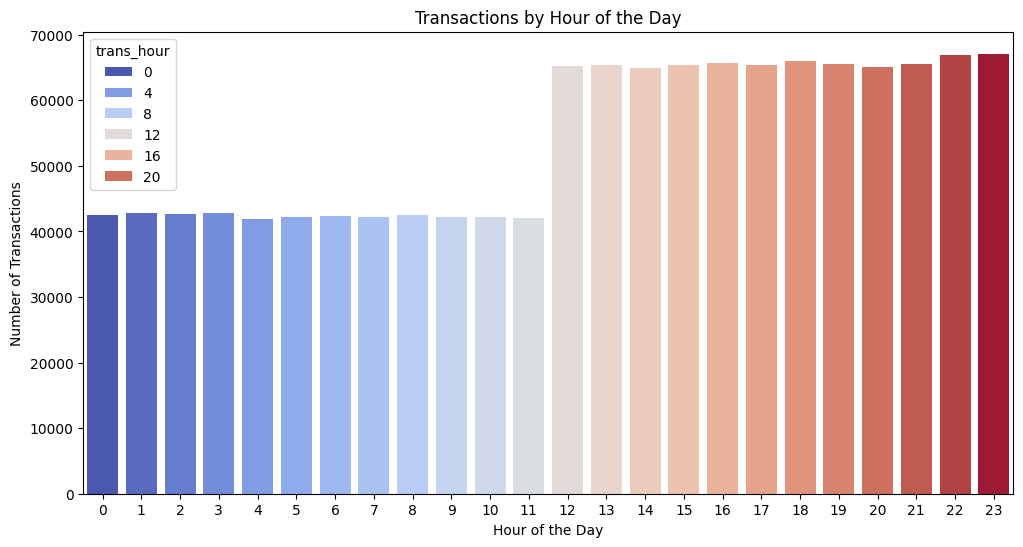

In [31]:
# 1. Which hour have most transaction ?

# Group by hour and count transactions
hour_counts = df.groupby('trans_hour').size().reset_index(name='counts')

# Plot the result
plt.figure(figsize=(12,6))
sns.barplot(data = hour_counts, x="trans_hour",y="counts",hue="trans_hour", palette='coolwarm')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\time\transactions_by_hour_of_the_day.png"
plt.savefig(image_path)

plt.show()

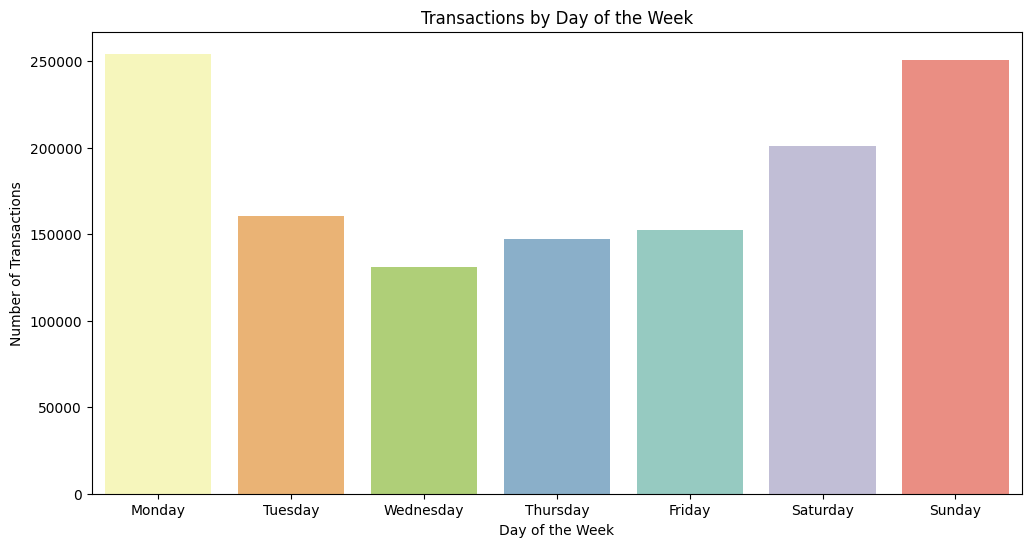

In [38]:
# 2. Which day in a week have most transaction ?

# Group by day and count transactions
day_counts = df.groupby('trans_day_of_week').size().reset_index(name='counts')

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x='trans_day_of_week', y='counts', data=day_counts, palette='Set3', hue="trans_day_of_week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\time\transactions_by_day_of_the_week.png"
plt.savefig(image_path)

plt.show()

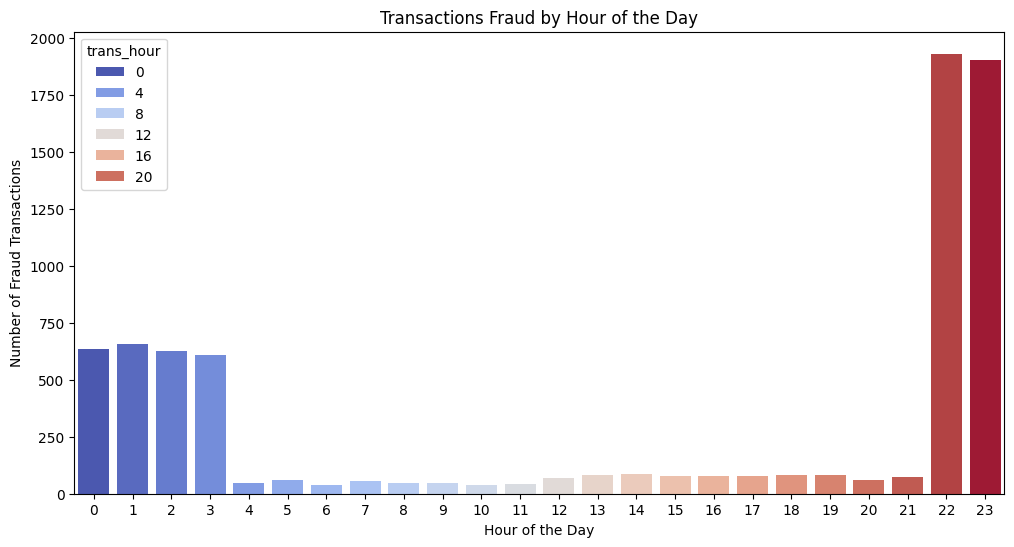

In [33]:
# 3. Which hour have most fraud transactions

# Group by hour and count transactions
hour_counts_fraud = df.groupby('trans_hour')["is_fraud"].sum().reset_index()

# Plot the result
plt.figure(figsize=(12,6))
sns.barplot(data = hour_counts_fraud, x="trans_hour",y="is_fraud",hue="trans_hour", palette='coolwarm')
plt.title('Transactions Fraud by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\time\fraud_transactions_by_hour_of_the_day.png"
plt.savefig(image_path)

plt.show()

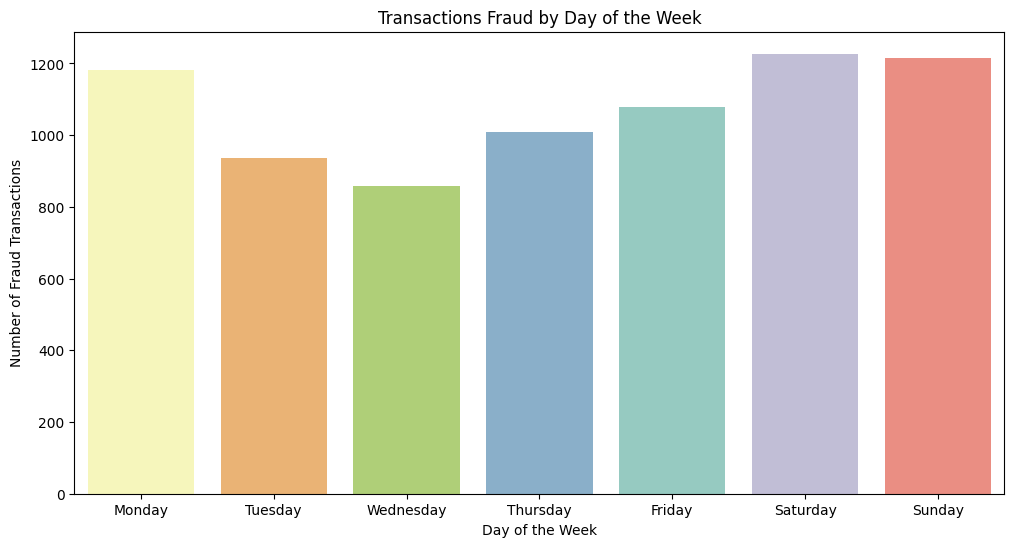

In [37]:
# 4. Which day in a week have most fraud transaction ?

# Exact the day of week


# Group by day and count transactions
day_counts_fraud = df.groupby('trans_day_of_week')["is_fraud"].sum().reset_index()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data = day_counts_fraud, x='trans_day_of_week', y='is_fraud', palette='Set3', hue="trans_day_of_week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title('Transactions Fraud by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Transactions')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\time\fraud_transactions_by_day_of_the_week.png"
plt.savefig(image_path)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17432\2882095303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = month_counts_fraud, x='trans_month', y='is_fraud', palette='hsv')


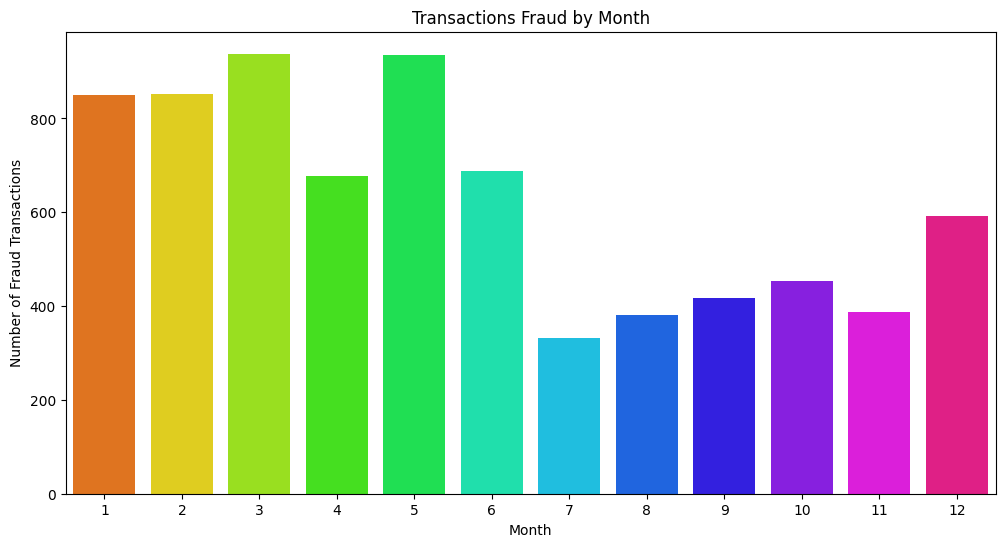

In [35]:
# 5. Which month in a year have most fraud transaction ?

# Group by month and count transactions
month_counts_fraud = df.groupby('trans_month')["is_fraud"].sum().reset_index()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data = month_counts_fraud, x='trans_month', y='is_fraud', palette='hsv')
plt.title('Transactions Fraud by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Transactions')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\time\fraud_transactions_by_month.png"
plt.savefig(image_path)

plt.show()